[Link to Kaggle Dataset](https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement)

In [132]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [133]:
data = pd.read_csv('Datasets/Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [134]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Problem in Hand

The aim here is to predict the salary based on the qualifications of the candidates as available or the least case to predict whether the candidate will be placed or not. Ultimately the attempt is to figure out what are the key factors which decide the selection of a candidate.

## Data Analysis

Using the data descriptions available as follows: 

`sl_no` : Serial Number 

`gender` : Gender- Male='M', Female='F' 

`ssc_p` : Secondary Education percentage- 10th Grade

`ssc_b` : Board of Education- Central/Others

`hsc_p` : Higher Secondary Education percentage- 12th Grade

`hsc_b` : Board of Education- Central/Others

`hsc_s` : Specialization in Higher Secondary Education

`degree_p` : Degree Percentage

`degree_t` : Under Graduation(Degree type)- Field of degree education

`workex` : Work Experience

`etest_p` : Employability test percentage (conducted by college)

`specialisation` : Post Graduation(MBA)- Specialization

`mba_p` : MBA percentage

`status` : Status of placement- Placed/Not placed

`salary` : Salary offered by corporate to candidates


Right now as an intial look-through, few difficulties present themselves like the presence of different boards which makes judging the percentages at the same level unfair and most probably inaccurate. So we will look at options where those are handled appropriately. But due to lack of data among the other boards(boards only having 2 choices `Central` and `Others`, basically having no division inside the non-central boards), we will have no choice other than to consider all `Others` boards entry equivalent.

Also here an oppurtunity presents itself, that is replacing all `NaN` values in the salary column with 0, though that might make sense in its literal terms but it would highly skew the results towards a lower salary as the difference in the qualities of someone placed and someone not placed might not be as major as the difference in 0 and some XX...XX salary would suggest.

### Possible Approaches

Hence as an initial outlook, we now have two options that is using two distinct models; one to classify placed and not placed and one to predict the salary, and only present the salary if the candidate is classified as placed (We will can this Plan A); alternatively we can just use a regressive model to predict a salary and only classify the candidate as placed if it is above a certain threshold (Plan B).

Now Plan B might seem simpler but it has an issue that it will never present a salary lower than the threshold which might be possible, so Plan A as of now seems the more sensible choice as it is more flexible in terms of the ability of Status(Placed/Not Placed) and Salary being able to depend on different factors.


## Encoding the Data

In [136]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import numpy as np

In [137]:
data.drop(['sl_no'],axis=1,inplace=True)
copydata=data

In [138]:
data['status']=data['status'].replace(['Placed','Not Placed'],[1,0])
data['workex']=data['workex'].replace(['Yes','No'],[1,0])

In [139]:
tr = make_column_transformer((OneHotEncoder(),['gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation']), remainder='passthrough')
data = pd.DataFrame(tr.fit_transform(data),columns=tr.get_feature_names_out())

In [140]:
data.head()

,onehotencoder__gender_F,onehotencoder__gender_M,onehotencoder__ssc_b_Central,onehotencoder__ssc_b_Others,onehotencoder__hsc_b_Central,onehotencoder__hsc_b_Others,onehotencoder__hsc_s_Arts,onehotencoder__hsc_s_Commerce,onehotencoder__hsc_s_Science,onehotencoder__degree_t_Comm&Mgmt,...,onehotencoder__specialisation_Mkt&Fin,onehotencoder__specialisation_Mkt&HR,remainder__ssc_p,remainder__hsc_p,remainder__degree_p,remainder__workex,remainder__etest_p,remainder__mba_p,remainder__status,remainder__salary
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,1.0,270000.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,79.33,78.33,77.48,1.0,86.5,66.28,1.0,200000.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,65.00,68.00,64.00,0.0,75.0,57.80,1.0,250000.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,56.00,52.00,52.00,0.0,66.0,59.43,0.0,NaN
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,85.80,73.60,73.30,0.0,96.8,55.50,1.0,425000.0


## Visualisation

In [141]:
import matplotlib.pyplot as plt
import matplotlib as mpl

array([[<AxesSubplot:title={'center':'onehotencoder__gender_F'}>,
        <AxesSubplot:title={'center':'onehotencoder__gender_M'}>,
        <AxesSubplot:title={'center':'onehotencoder__ssc_b_Central'}>,
        <AxesSubplot:title={'center':'onehotencoder__ssc_b_Others'}>,
        <AxesSubplot:title={'center':'onehotencoder__hsc_b_Central'}>],
       [<AxesSubplot:title={'center':'onehotencoder__hsc_b_Others'}>,
        <AxesSubplot:title={'center':'onehotencoder__hsc_s_Arts'}>,
        <AxesSubplot:title={'center':'onehotencoder__hsc_s_Commerce'}>,
        <AxesSubplot:title={'center':'onehotencoder__hsc_s_Science'}>,
        <AxesSubplot:title={'center':'onehotencoder__degree_t_Comm&Mgmt'}>],
       [<AxesSubplot:title={'center':'onehotencoder__degree_t_Others'}>,
        <AxesSubplot:title={'center':'onehotencoder__degree_t_Sci&Tech'}>,
        <AxesSubplot:title={'center':'onehotencoder__specialisation_Mkt&Fin'}>,
        <AxesSubplot:title={'center':'onehotencoder__specialisation_M

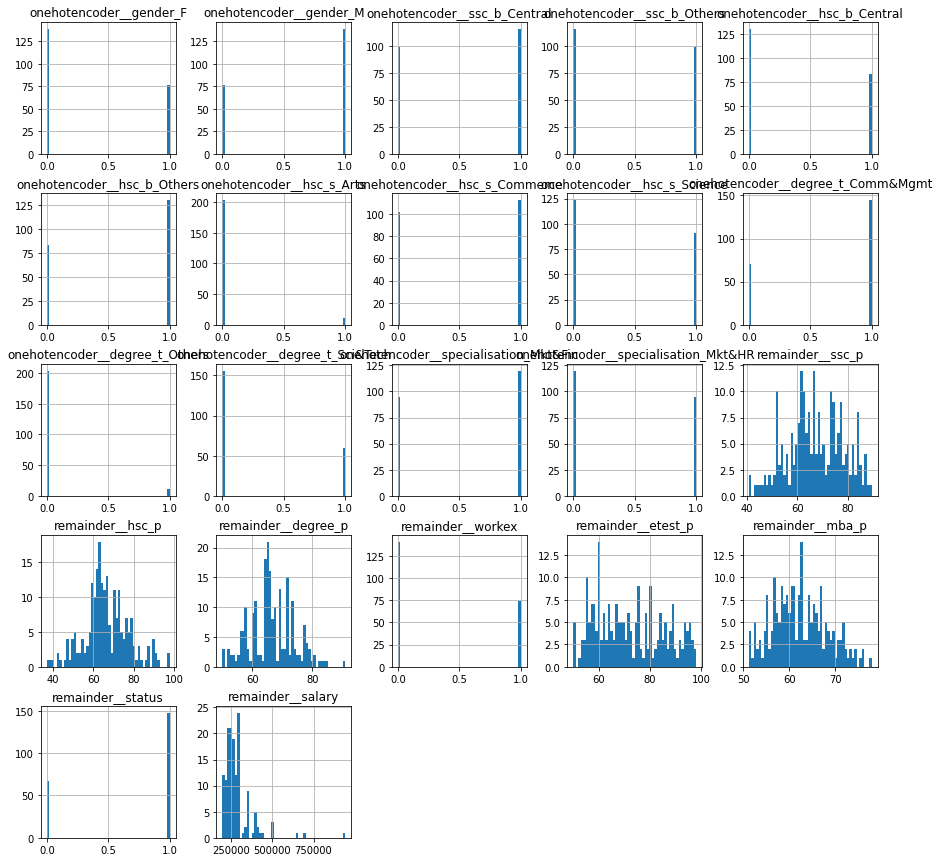

In [142]:
data.hist(bins=50, figsize=(15,15))

Note: since the dataset is very very small, it is not considerable to eliminate outliers as it will can reduce the amount of data significantly.

## Finding Correlations (also, Visualisation Continued)

In [143]:
correlations_status=data.corr()['remainder__status'].sort_values(ascending=False)
correlations_salary=data.corr()['remainder__salary'].sort_values(ascending=False)
print("Status Correlations:\n",correlations_status)
print("Salary Correlations:\n",correlations_salary)

Status Correlations:
 remainder__status                        1.000000
remainder__ssc_p                         0.607889
remainder__hsc_p                         0.491228
remainder__degree_p                      0.479861
remainder__workex                        0.276060
onehotencoder__specialisation_Mkt&Fin    0.250655
remainder__etest_p                       0.127639
onehotencoder__gender_M                  0.090670
remainder__mba_p                         0.076922
onehotencoder__degree_t_Comm&Mgmt        0.046849
onehotencoder__ssc_b_Others              0.037297
onehotencoder__hsc_s_Commerce            0.024414
onehotencoder__hsc_b_Others              0.016945
onehotencoder__degree_t_Sci&Tech         0.008688
onehotencoder__hsc_s_Science             0.007279
onehotencoder__hsc_b_Central            -0.016945
onehotencoder__ssc_b_Central            -0.037297
onehotencoder__hsc_s_Arts               -0.071653
onehotencoder__gender_F                 -0.090670
onehotencoder__degree_t_Othe

##### Important conclusion we can draw from this is that the two things to be predicted(status and salary) depend on various parameters quite differently. This actually proves that choosing [Plan B, as discussed initially](#Possible-Approaches) was indeed the better option as it allowed the needed flexibility.

The above correlation values show that being from non-Central boards has a very very slight positive impact in being selected but hardly any conclusive impact on the salary once employed.

In [144]:
import seaborn as sns

def bins(data,x,y,x_bin,y_bin):
    x_min=np.array(data[x]).min()
    y_min=np.array(data[y]).min()
    x_max=np.array(data[x]).max()
    y_max=np.array(data[y]).max()
    x_step=(x_max-x_min)/x_bin
    y_step=(y_max-y_min)/y_bin
    return [np.arange(x_min, x_max, x_step),np.arange(y_min, y_max, y_step)]

In [145]:
#heat1 is ratio of selection vs schooling percentages basically
heat1 = data.groupby([pd.cut(data['remainder__ssc_p'], bins(data,'remainder__ssc_p','remainder__hsc_p',8,8)[0]),pd.cut(data['remainder__hsc_p'], bins(data,'remainder__ssc_p','remainder__hsc_p',8,8)[1])])['remainder__status'].mean().unstack()
heat2 = data.groupby([pd.cut(data['remainder__degree_p'], bins(data,'remainder__degree_p','remainder__etest_p',8,8)[0]),pd.cut(data['remainder__etest_p'], bins(data,'remainder__degree_p','remainder__etest_p',8,8)[1])])['remainder__status'].mean().unstack()
heat1

remainder__hsc_p,"(37.0, 44.588]","(44.588, 52.175]","(52.175, 59.762]","(59.762, 67.35]","(67.35, 74.938]","(74.938, 82.525]","(82.525, 90.112]"
remainder__ssc_p,,,,,,,
"(40.89, 46.954]",0.0,0.0,0.000000,0.000000,NaN,NaN,NaN
"(46.954, 53.018]",0.0,0.0,0.142857,0.333333,0.000000,NaN,NaN
"(53.018, 59.081]",0.0,0.0,NaN,0.538462,0.000000,0.000000,NaN
"(59.081, 65.145]",0.0,0.0,0.000000,0.695652,0.818182,0.833333,1.0
"(65.145, 71.209]",NaN,0.0,0.666667,0.736842,0.818182,1.000000,NaN
"(71.209, 77.272]",NaN,1.0,1.000000,0.818182,1.000000,1.000000,1.0
"(77.272, 83.336]",NaN,NaN,NaN,0.888889,1.000000,1.000000,1.0


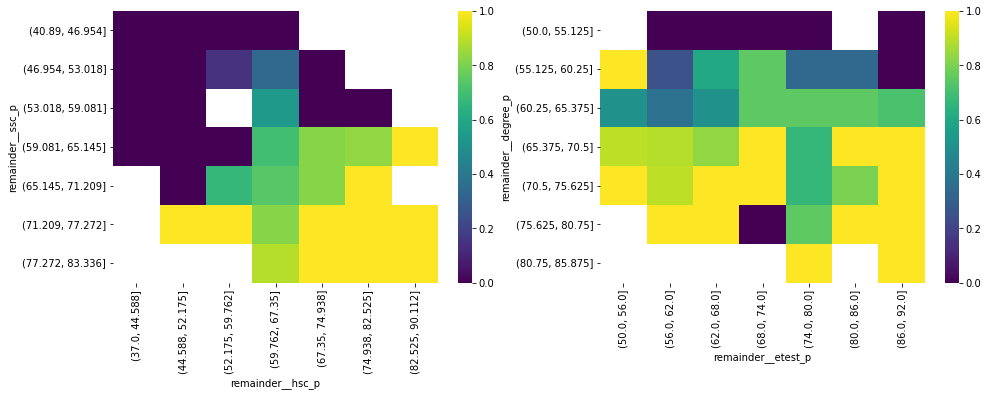

In [146]:
plt.figure(figsize = [16, 5])
plt.subplot(1,2,1)
sns.heatmap(heat1,cmap="viridis")
plt.subplot(1,2,2)
sns.heatmap(heat2,cmap="viridis")
plt.show()

These heatmaps validate the correlation values as should've been the case proving that the 4 parameters plotted have a significant enough dependence on selection. The first heatmap shows that the selection ratio almost equally depends on both `ssc_p` and `hsc_p` whereas the second one shows that the ratio is more dependent on the `degree_p` than the `etest_p`.

The second plot also somewhat shows that the `etest_p` (The percentage in the employability test conducted by the college) is not quite strictly predicting the actual selection probability, though a small positive dependence is still there. Also, the reason for there being such a small dependence can be that the test's score is not available or presented to the interviewers unline the School and Degree percentages.

Note: The heatmaps even after being so lightly binned, have a lot of empty boxes due to the lack of data because the dataset was so small.

## Splitting data into training and test data (for status and salary prediction separately)

In [147]:
from sklearn.model_selection import train_test_split
#for classifier, all data can be used
x_status = data.drop(['remainder__status', 'remainder__salary'], axis=1)
y_status = data['remainder__status']
#for salary prediction only non-NaN entries being used
x_salary = data[data['remainder__salary'].notna()].drop(['remainder__status', 'remainder__salary'], axis=1)
y_salary = data[data['remainder__salary'].notna()]['remainder__salary']
#splitting into training and test data
x_status_train, x_status_test, y_status_train, y_status_test = train_test_split(x_status, y_status, test_size=0.2, random_state=42)
x_salary_train, x_salary_test, y_salary_train, y_salary_test = train_test_split(x_salary, y_salary, test_size=0.2, random_state=42)

We will try out different classifying algorithms on the dataset and accordingly use the best performing algorithm.

## Performing ANOVA
### for classification, status:

In [148]:
from sklearn.feature_selection import f_classif,f_regression,SelectKBest 

In [149]:
select_status = SelectKBest(score_func=f_classif)
select_status.fit(x_status,y_status)
score_status = pd.DataFrame(select_status.scores_)
features = pd.DataFrame(x_status.columns)
score_status = pd.concat([features,score_status],axis=1)
score_status.columns = ["Input Features","Score"]
score_status.sort_values(by='Score',ascending=False)

,Input Features,Score
14,remainder__ssc_p,124.842506
15,remainder__hsc_p,67.745188
16,remainder__degree_p,63.719176
17,remainder__workex,17.571660
13,onehotencoder__specialisation_Mkt&HR,14.279511
12,onehotencoder__specialisation_Mkt&Fin,14.279511
18,remainder__etest_p,3.527627
10,onehotencoder__degree_t_Others,2.968114
0,onehotencoder__gender_F,1.765614
1,onehotencoder__gender_M,1.765614


### for regression, salary:

In [150]:
select_salary = SelectKBest(score_func=f_regression)
select_salary.fit(x_salary,y_salary)
select_salary.fit(x_salary,y_salary)
score_salary = pd.DataFrame(select_salary.scores_)
features = pd.DataFrame(x_salary.columns)
score_salary = pd.concat([features,score_salary],axis=1)
score_salary.columns = ["Input Features","Score"]
score_salary.sort_values(by='Score',ascending=False)

,Input Features,Score
18,remainder__etest_p,4.794277
19,remainder__mba_p,4.613212
11,onehotencoder__degree_t_Sci&Tech,4.477212
9,onehotencoder__degree_t_Comm&Mgmt,3.851634
1,onehotencoder__gender_M,3.782450
0,onehotencoder__gender_F,3.782450
12,onehotencoder__specialisation_Mkt&Fin,3.205631
13,onehotencoder__specialisation_Mkt&HR,3.205631
17,remainder__workex,2.789347
6,onehotencoder__hsc_s_Arts,1.146050


The ANOVA results coincide with the correlation values and we'll be dropping the `hsc_b` and `ssc_b`.

In [151]:
x_salary_train=x_salary_train.drop(['onehotencoder__ssc_b_Central','onehotencoder__ssc_b_Others','onehotencoder__hsc_b_Others','onehotencoder__hsc_b_Central'],axis=1)
x_salary_test=x_salary_test.drop(['onehotencoder__ssc_b_Central','onehotencoder__ssc_b_Others','onehotencoder__hsc_b_Others','onehotencoder__hsc_b_Central'],axis=1)
x_status_train=x_status_train.drop(['onehotencoder__ssc_b_Central','onehotencoder__ssc_b_Others','onehotencoder__hsc_b_Others','onehotencoder__hsc_b_Central'],axis=1)
x_status_test=x_status_test.drop(['onehotencoder__ssc_b_Central','onehotencoder__ssc_b_Others','onehotencoder__hsc_b_Others','onehotencoder__hsc_b_Central'],axis=1)

### Scaling

In [152]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_status_train=scalar.fit_transform(x_status_train)
x_status_test=scalar.fit_transform(x_status_test)
x_salary_train=scalar.fit_transform(x_salary_train)
x_salary_test=scalar.fit_transform(x_salary_test)


## Trying out different Classification Models (doing CV)

In [153]:
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree

Cross Validation Accuracy of SVM = 0.8611111111111113 with Std. Deviation = 0.057487552213413465
Cross Validation Accuracy of Decision Tree = 0.7666666666666666 with Std. Deviation = 0.10822076881474091
Cross Validation Accuracy of Random Forest = 0.8431372549019608 with Std. Deviation = 0.09795203095076725
Cross Validation Accuracy of XG-Boost = 0.8261437908496732 with Std. Deviation = 0.10681626380136303
Cross Validation Accuracy of KNN = 0.8022875816993464 with Std. Deviation = 0.08386986068125617
Cross Validation Accuracy of Logistic Regression = 0.8781045751633988 with Std. Deviation = 0.054723683472001565


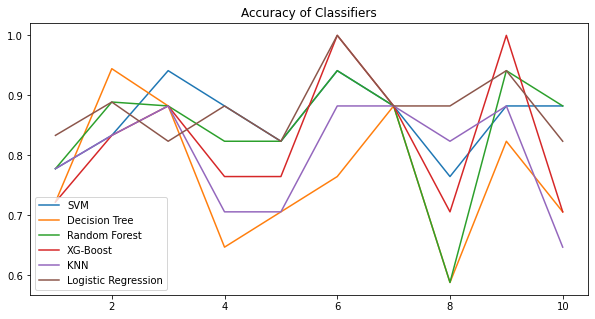

In [154]:
c0 = ("SVM",svm.SVC(random_state=42))
c1 = ("Decision Tree",tree.DecisionTreeClassifier(random_state=42))
c2 = ("Random Forest",RandomForestClassifier(random_state=42))
c3 = ("XG-Boost",xgboost.XGBClassifier(random_state=42))
c4 = ("KNN",KNeighborsClassifier(n_neighbors=10))
c5 = ("Logistic Regression",LogisticRegression())
classifiers = [c0,c1,c2,c3,c4,c5]

plt.figure(figsize=(10,5))
for c in classifiers:
    scores = cross_val_score(c[1],x_status_train,y_status_train, scoring="accuracy",cv=10)
    print(f"Cross Validation Accuracy of {c[0]} = {scores.mean()} with Std. Deviation = {scores.std()}")
    plt.plot(range(1,11),scores,label=c[0])
    # c[1].fit(x_status_train,y_status_train)
    # y_pred = c[1].predict(x_status_test)
    # print("Accuracy of %s: %s"%(c[0], accuracy_score(y_status_test, y_pred)))
    # print("Confusion Matrix of %s: %s\n"%(c[0], confusion_matrix(y_status_test, y_pred)))
plt.title("Accuracy of Classifiers")
plt.legend()
plt.show()


## Trying out differente Regressors

Cross Validation RMS Error of LinearRegression() = 84816.08164158216 with Std. Deviation = 40665.27402879194
Cross Validation RMS Error of RandomForestRegressor() = 83832.24323065058 with Std. Deviation = 43817.34851519299
Cross Validation RMS Error of DecisionTreeRegressor() = 124105.85511724523 with Std. Deviation = 63939.49837846761
Cross Validation RMS Error of SVR() = 81461.91990175392 with Std. Deviation = 49484.579044834725
Cross Validation RMS Error of GradientBoostingRegressor() = 94204.0450540083 with Std. Deviation = 42291.52744105637


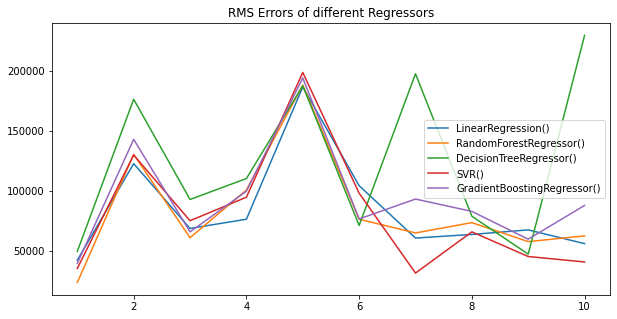

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

r0 = LinearRegression()
r1 = RandomForestRegressor()
r2 = tree.DecisionTreeRegressor()
r3 = SVR()
r4 = GradientBoostingRegressor()

regressors  = [r0,r1,r2,r3,r4]

plt.figure(figsize=(10,5))
for r in regressors:
    scores = cross_val_score(r,x_salary_train,y_salary_train, scoring="neg_mean_squared_error",cv=10)
    print(f"Cross Validation RMS Error of {r} = {np.sqrt(-scores).mean()} with Std. Deviation = {np.sqrt(-scores).std()}")
    plt.plot(range(1,11),np.sqrt(-scores),label=r) #nsqrt of neg of neg mean sq error --> root mean sq error
plt.title("RMS Errors of different Regressors")
plt.legend()
plt.show()

###### References used: Encoding - [1](https://datagy.io/sklearn-one-hot-encode/), Model Selection - [2](https://medium.datadriveninvestor.com/choosing-the-best-algorithm-for-your-classification-model-7c632c78f38f), Heatmaps - [3](https://stackoverflow.com/a/42952677/17628552), [4](https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python/), ANOVA - [5](https://www.investopedia.com/terms/a/anova.asp), [6](https://github.com/atulpatelDS/Youtube/blob/main/Feature_Engineering/Feature%20Selection%20using%20ANOVA%20Test%20for%20Classification%20and%20Regression%20-%20Tutorial%204.ipynb) and loads of stackoverflow and YouTube